In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/balanced_dc_motor_dataset.csv')

# Display the first few rows of the dataset
data.head()


,Current,Voltage,Vibration,RPM,Torque,Temperature,Failure
0,1.049827,0.276075,0.127649,-1.873806,0.823634,2.452737,1
1,1.350638,0.658687,-0.625774,-1.612603,0.945207,3.021333,1
2,1.643922,-1.241554,0.004030,0.324491,-1.215676,-0.353558,0
3,-1.483416,-1.673234,-0.737883,-2.440201,-1.008242,-2.478708,0
4,0.289284,0.402992,0.972724,-0.219409,-1.348499,-0.224056,0


from matplotlib import pyplot as plt
_df_0['Current'].plot(kind='hist', bins=20, title='Current')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Voltage'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Vibration'].plot(kind='hist', bins=20, title='Vibration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RPM'].plot(kind='hist', bins=20, title='RPM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Current', y='Voltage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Voltage', y='Vibration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Vibration', y='RPM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RPM', y='Torque', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Current'].plot(kind='line', figsize=(8, 4), title='Current')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Voltage'].plot(kind='line', figsize=(8, 4), title='Voltage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Vibration'].plot(kind='line', figsize=(8, 4), title='Vibration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['RPM'].plot(kind='line', figsize=(8, 4), title='RPM')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
# Get basic information about the dataset
data.info()

# Display the first few rows
data.head()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104635 entries, 0 to 104634
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Current      104635 non-null  float64
 1   Voltage      104635 non-null  float64
 2   Vibration    104635 non-null  float64
 3   RPM          104635 non-null  float64
 4   Torque       104635 non-null  float64
 5   Temperature  104635 non-null  float64
 6   Failure      104635 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 5.6 MB


,0
Current,0
Voltage,0
Vibration,0
RPM,0
Torque,0
Temperature,0
Failure,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['Failure'])  # Features
y = data['Failure']                 # Target (failure or non-failure)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalizing each feature to have mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple feed-forward neural network
model = models.Sequential()

# Input layer
model.add(layers.Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))

# Hidden layers with dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9242 - loss: 0.1849 - val_accuracy: 0.9251 - val_loss: 0.1829
Epoch 2/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9229 - loss: 0.1919 - val_accuracy: 0.9262 - val_loss: 0.1816
Epoch 3/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9236 - loss: 0.1899 - val_accuracy: 0.9252 - val_loss: 0.1819
Epoch 4/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9229 - loss: 0.1908 - val_accuracy: 0.9253 - val_loss: 0.1825
Epoch 5/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.1871 - val_accuracy: 0.9240 - val_loss: 0.1819
Epoch 6/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9235 - loss: 0.1877 - val_accuracy: 0.9260 - val_loss: 0.1812
Epoch 7/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9242 - loss: 0.1869 - val_accuracy: 0.9251 - val_loss: 0.1818
Epoch 8/20
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9237 - loss: 0.1867 -

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9270 - loss: 0.1725
Test Accuracy: 92.60%


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred_class))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14052
           1       0.91      0.86      0.88      6875

    accuracy                           0.93     20927
   macro avg       0.92      0.91      0.91     20927
weighted avg       0.93      0.93      0.93     20927

[[13479   573]
 [  976  5899]]


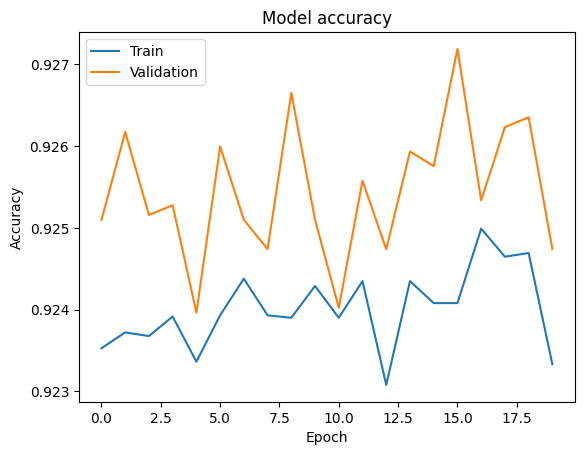

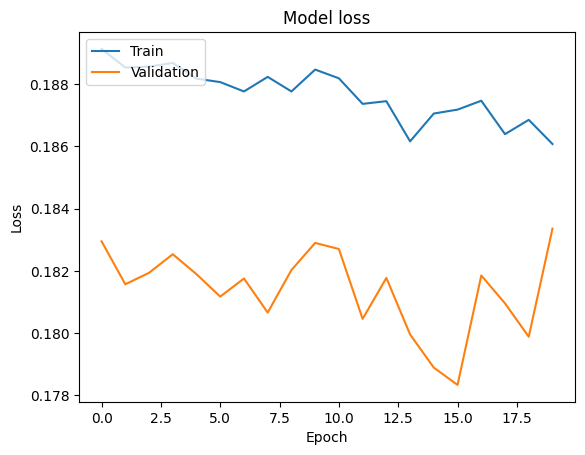

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['Failure'])  # Features
y = data['Failure']                 # Target (failure or non-failure)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to be 3D (samples, time steps, features) - for RNN input
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build an RNN model using LSTM layers
model = models.Sequential()

# LSTM layer with 64 units
model.add(layers.LSTM(64, input_shape=(1, X_train_scaled.shape[1]), activation='tanh', return_sequences=False))

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the RNN model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train_rnn, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8397 - loss: 0.3692 - val_accuracy: 0.9046 - val_loss: 0.2290
Epoch 2/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8981 - loss: 0.2413 - val_accuracy: 0.9103 - val_loss: 0.2120
Epoch 3/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9072 - loss: 0.2228 - val_accuracy: 0.9143 - val_loss: 0.2027
Epoch 4/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9112 - loss: 0.2141 - val_accuracy: 0.9184 - val_loss: 0.1962
Epoch 5/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9186 - loss: 0.2040 - val_accuracy: 0.9216 - val_loss: 0.1891
Epoch 6/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9196 - loss: 0.2002 - val_accuracy: 0.9227 - val_loss: 0.1878
Epoch 7/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9205 - loss: 0.1995 - val_accuracy: 0.9235 - val_loss: 0.1860
Epoch 8/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9202 - loss: 0.195

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9272 - loss: 0.1660
Test Accuracy: 92.71%


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(X_test_rnn)
y_pred_class = (y_pred > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred_class))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)


654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14052
           1       0.91      0.86      0.89      6875

    accuracy                           0.93     20927
   macro avg       0.92      0.91      0.92     20927
weighted avg       0.93      0.93      0.93     20927

[[13500   552]
 [  973  5902]]


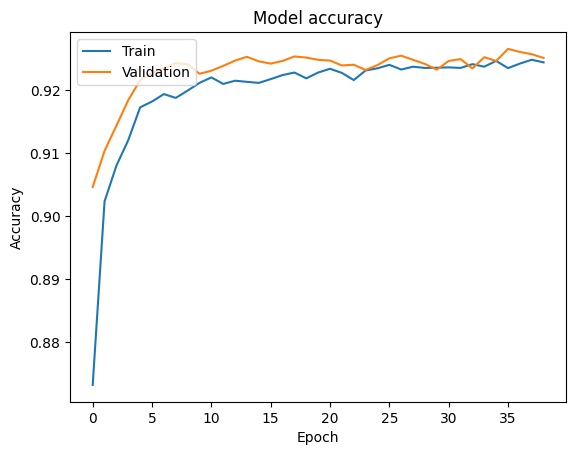

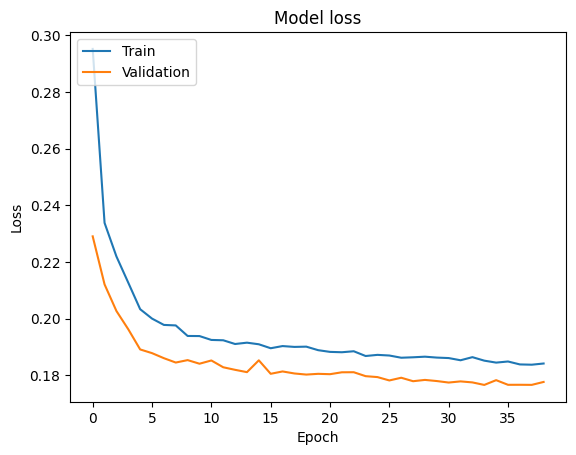

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
